# Project 3: Collaborative Filtering

**ECE 219**: Large-Scale Data Mining: Models and Algorithms [Winter 2021]

Prof. Vwani Roychowdhury

UCLA, Department of ECE

### Q1 - 15

Surprise is an easy-to-use Python scikit for recommender systems.

https://surprise.readthedocs.io/en/stable/index.html

In [1]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import string
import sys

import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(precision=4, suppress=True)

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [2]:
cols = ["userId", "movieId", "rating"]
Rdf = pd.read_csv('C:/Work/UCLA/Winter 2021/219 Large Scale Data Mining Models and Algorithms/Project_3/ml-latest-small/ratings.csv',usecols = cols)
#Rdf = pd.read_csv('C:/Work/UCLA/Winter 2021/219 Large Scale Data Mining Models and Algorithms/Project_3/ml-latest-small/tp.csv',usecols = cols)
R = Rdf.pivot(index = "userId", columns = "movieId", values = "rating")
R.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
(Rdf['movieId'].unique()).shape

(9724,)

In [3]:
R = R.to_numpy()  #R is now the numpy Ratings matrix
m = R.shape[0]      #m is the number of users
n = R.shape[1]      #n is the number of movies

print("Number of users:", m)
print("Number of movies:", n)


Number of users: 610
Number of movies: 9724


## Q1. Sparsity

In [4]:
num_ratings = Rdf.shape[0]
sparsity = num_ratings/(m*n)

print("Sparsity is", sparsity)
print("Num of available ratings = ", num_ratings)
print("Num of possible ratings = ", m*n)


Sparsity is 0.016999683055613623
Num of available ratings =  100836
Num of possible ratings =  5931640


## Q2. Histogram showing frequency of rating values

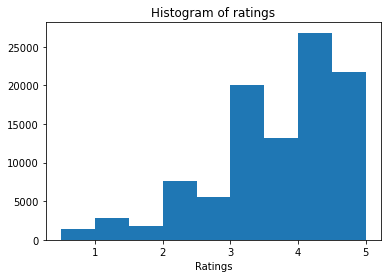

In [5]:
plt.hist(Rdf["rating"], bins = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.title("Histogram of ratings")
plt.xlabel("Ratings")
plt.show()

Most of the ratings fall between 3 to 5. The distribution of ratings is not centered about the center of the ratings domain [0.5,5]. That means users have tended to give high ratings and this factor must be considered while developing a learning algorithm. 

## Q3. Distribution of number of ratings received among movies

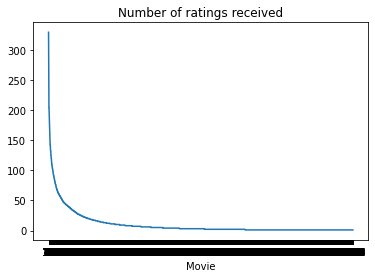

In [83]:
mov = Rdf['movieId'].value_counts()
mov = mov.to_numpy()

plt.plot(np.arange(1,n+1), mov)
plt.xticks(np.arange(1,n+1))
plt.title("Number of ratings received")
plt.xlabel("Movie")
plt.show()

## Q4. Distribution of the number of ratings among users

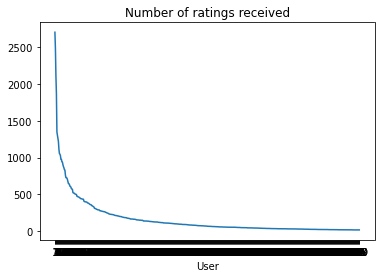

In [84]:
users = Rdf['userId'].value_counts()
users = users.to_numpy()

plt.plot(np.arange(1,m+1), users)
plt.xticks(np.arange(1,m+1))
plt.title("Number of ratings received")
plt.xlabel("User")
plt.show()

## Q5. Features of the ratings distribution

Number of ratings strictly less than 3:
19073
Number of ratings greater than or equal to 3:
81763
Percentage of ratings greater than or equal to 3:
81.08512832718473
Number of movies with ratings less than or equal to 25:
8712


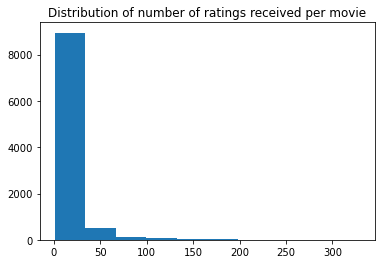

Median number of ratings received by a movie
3.0
Mean of number of ratings per movie:
10.369806663924312
Movie with the maximum number of ratings:
329


In [28]:
print("Number of ratings strictly less than 3:")
nrl = len(Rdf[Rdf['rating'] < 3])
print(nrl)

print("Number of ratings greater than or equal to 3:")
nrh = len(Rdf[Rdf['rating'] >= 3])
print(nrh)

print("Percentage of ratings greater than or equal to 3:")
print(100.0 * nrh/(nrh+nrl))

permov_rat = Rdf.value_counts(["movieId"])
print("Number of movies with ratings less than or equal to 25:")
print(len(permov_rat[permov_rat <= 25]))

M_mov = permov_rat.to_numpy()
plt.hist(M_mov)
plt.title("Distribution of number of ratings received per movie")
plt.show()

print("Median number of ratings received by a movie")
print(np.median(M_mov))
print("Mean of number of ratings per movie:")
print(np.mean(M_mov))
print("Movie with the maximum number of ratings:")
print(np.max(M_mov))

As we see from the statistics and the histograms, the ratings distribution is skewed in that most of the ratings are greater than or equal to three. By calculation, 81.085% of the ratings recevied are greater than or equal to 3. Thus, most users tended to give high ratings and only few users tended to give numerically low ratings.

To know a user's preference for a movie, it would be more informative to find the difference of a user's rating form their mean ratings. Positive values in this case tell us that the user liked the move more than an average movie according to them.

Also, a histogram of the number of ratings received per movie shows that many movies received less than 25 ratings (8712/9724 = 89.59% of the movies received less than 25 ratings). As less information is available about many movies, the testing has to be performed with this consideration. The medain number of ratings received per per movie is 3, Showing that atleast 50% of the movies have atmost three ratings.

Some features of the distributions are:

Number of ratings strictly less than 3:
19073
Number of ratings greater than or equal to 3:
81763
Percentage of ratings greater than or equal to 3:
81.08512832718473

Number of movies with ratings less than or equal to 25:
8712
Median number of ratings received by a movie
3.0
Mean of number of ratings per movie:
10.369806663924312

## Q6. Histogram of variance of the rating values received by each movie

Maximum variance is 5.0625
Minimum variance is 0.0


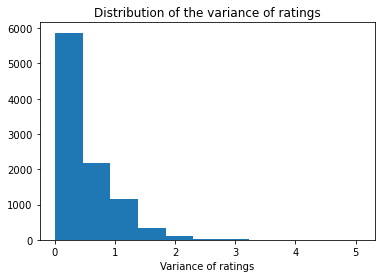

In [85]:
mov_var = Rdf[["movieId","rating"]].groupby(['movieId']).var(ddof=0) #Ref: ddof = 0 makes the divisor used in calculations N-ddof = N
mov_var = mov_var.to_numpy()
mov_var = np.squeeze(mov_var)

print("Maximum variance is", np.max(mov_var))
print("Minimum variance is",np.min(mov_var))
bins = np.ceil((np.max(mov_var) - np.min(mov_var))/0.5)
#print(bins)
plt.hist(mov_var, bins = int(bins))
plt.title("Distribution of the variance of ratings")
plt.xlabel("Variance of ratings")
plt.show()

Notice the high number of movies with low variance in their ratings. Almost all movies (greater than 7000) had their ratings variance less than 1. Apart from high ratings received by good movies across user tastes, one other reason for is the small scale in ratings(0.5 to 5 in steps of 0.5). Thus movies that still have large variance must be tested separately.

## Q7. Pearson Correlation Coefficient

<font size="5">$\mu_u = \frac{\Sigma_{k \in I_u}r_{uk}}{size(I_u)}$</font>

## Q8. 

$I_u \cap I_v = \phi$ indicates that there were no common movies rated by both user $u$ and user $v$

## Q9. Mean centering

Since ratings ought to help us compare how much a user liked one movie over the others they watched, mean centered ratings are a better measure for this purpose. This is because mean centering removes the individual bias of users - some users give raw ratings in the higher ranges for all movies, and hence mean centering allows us to conclude that the now positive rated movies are the ones they prefer more than an average movie according to them.

In [86]:
#conda install -c conda-forge scikit-surprise

## Question 10

Design a k-NN collaborative filter to predict the ratings of the movies in the
MovieLens dataset and evaluate it’s performance using 10-fold cross validation. Sweep k (number
of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and
average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE
(Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).


In [6]:
from surprise import Reader
from surprise import Dataset
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise import similarities
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import accuracy

In [88]:
reader = Reader(rating_scale=(0.5, 5))
R_data = Dataset.load_from_df(Rdf[["userId", "movieId", "rating"]], reader)

sim_options = {'name': 'pearson',
              'user_based': True}

k_list = np.arange(2,101,2)
scores = []

for k in k_list:
    algo = KNNWithMeans(k = k,sim_options=sim_options, verbose = False)
    pred = cross_validate(algo, R_data, cv = 10, verbose = False, n_jobs = -1)
    rmse = np.mean(pred['test_rmse'])
    rmae = np.mean(pred['test_mae'])
    scores.append([rmse, rmae])
    
scores_df = pd.DataFrame(scores, columns = ['Avg RMSE', 'Avg MAE'], index = k_list)

scores_df

,Avg RMSE,Avg MAE
2,1.018185,0.785315
4,0.945780,0.726422
6,0.919274,0.704402
8,0.907985,0.694670
10,0.900566,0.688128
12,0.898031,0.685315
14,0.895245,0.682683
16,0.892838,0.680807
18,0.893598,0.680957
20,0.891548,0.679053


<AxesSubplot:title={'center':'Cross validation - MAE'}, xlabel='k', ylabel='MAE'>

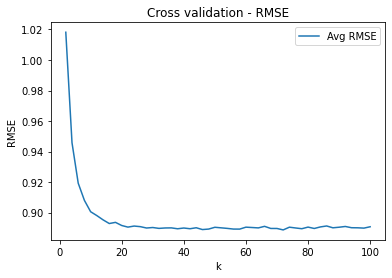

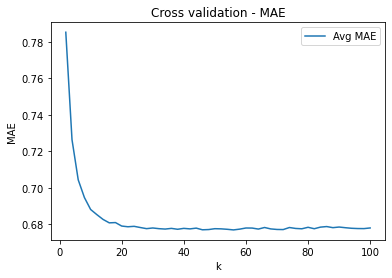

In [89]:
scores_df.plot(y = 'Avg RMSE', xlabel = "k", ylabel = "RMSE", title = "Cross validation - RMSE")
scores_df.plot(y = 'Avg MAE', xlabel = "k", ylabel = "MAE", title = "Cross validation - MAE")

## Question 11

Use the plot from question 10, to find a ’minimum k’. Note: The term ’minimum
k’ in this context means that increasing k above the minimum value would not result in a significant
decrease in average RMSE or average MAE. If you get the plot correct, then ’minimum k’ would
correspond to the k value for which average RMSE and average MAE converges to a steady-state
value. Please report the steady state values of average RMSE and average MAE

#### Answer:

For RMSE, minimum k = 20, and RMSE(k=20) = 0.891

For MAE, minimum k = 28, and MAE (k=28) = 0.677 (note: k = 20 (MAE = 0.679) also gives the stable value approximayted until the second decimal)

## Question 12

Design a k-NN collaborative filter to predict the ratings of the movies in the
popular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average
RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k
(X-axis). Also, report the minimum average RMSE

In [7]:
reader = Reader(rating_scale=(0.5, 5))

R_data = Dataset.load_from_df(Rdf[["userId", "movieId", "rating"]], reader)

sim_options = {'name': 'pearson',
              'user_based': True}

In [5]:
def popular_movies(df):
    ts = df.value_counts('movieId') #ts is a series showing number of ratings for each 'movieId'
    movies = ts[ts>2].index #ts[ts>2]'s indices are movieId values satisfying the condition
    trim = df.loc[df['movieId'].isin(movies)]
    trim
    return trim

In [6]:
kf = KFold(n_splits=10)

k_list = np.arange(2,101,2)

scores = []

for k in k_list:
    
    algo = KNNWithMeans(k = k,sim_options=sim_options, verbose = False)
    set_scores = []
    for trainset, testset in kf.split(R_data):
        #trainset and testset are lists made of tuples
        algo.fit(trainset)
        
        test_df = pd.DataFrame(testset, columns = ["userId", "movieId", "rating"])#converting testset into dataframe test_df
        test_df = popular_movies(test_df)
        test_tuples = [tuple(x) for x in test_df.to_numpy()] #converting the trimmed test_df into tuples
        
        predictions = algo.test(test_tuples)

        set_scores.append(accuracy.rmse(predictions, verbose=False))
    
    scores.append(sum(set_scores)/len(set_scores))

Minimum average RMSE is  0.8542364591375305


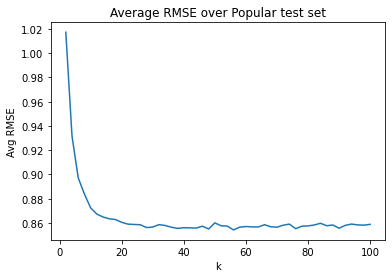

In [7]:
print("Minimum average RMSE is ", min(scores))
plt.plot(k_list, scores)
plt.xlabel('k')
plt.ylabel("Avg RMSE")
plt.title("Average RMSE over Popular test set")
plt.show()

## Question 13. Unpopular movies test sets

Design a k-NN collaborative filter to predict the ratings of the movies in the
unpopular movie trimmed test set and evaluate it’s performance using 10-fold cross validation.
Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the
average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis)
against k (X-axis). Also, report the minimum average RMSE

In [8]:
def unpopular_movies(df):
    ts = df.value_counts('movieId') #ts is a series showing number of ratings for each 'movieId'
    movies = ts[ts<=2].index #ts[ts>2]'s indices are movieId values satisfying the condition
    trim = df.loc[df['movieId'].isin(movies)]
    trim
    return trim

In [9]:
kf = KFold(n_splits=10)

k_list = np.arange(2,101,2)

scores = []

for k in k_list:
    
    algo = KNNWithMeans(k = k,sim_options=sim_options, verbose = False)
    set_scores = []
    for trainset, testset in kf.split(R_data):
        #trainset and testset are lists made of tuples
        algo.fit(trainset)
        
        test_df = pd.DataFrame(testset, columns = ["userId", "movieId", "rating"])
        test_df = unpopular_movies(test_df)
        test_tuples = [tuple(x) for x in test_df.to_numpy()]
        
        predictions = algo.test(test_tuples)

        set_scores.append(accuracy.rmse(predictions, verbose=False))
    
    scores.append(sum(set_scores)/len(set_scores))

Minimum average RMSE is  0.9530988852354133


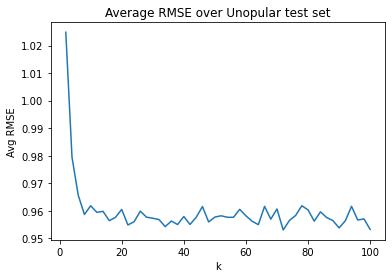

In [10]:
print("Minimum average RMSE is ", min(scores))
plt.plot(k_list, scores)
plt.xlabel('k')
plt.ylabel("Avg RMSE")
plt.title("Average RMSE over Unopular test set")
plt.show()

## Q 14. High variance movie test sets

 Design a k-NN collaborative filter to predict the ratings of the movies in the
high variance movie trimmed test set and evaluate it’s performance using 10-fold cross validation.
Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average
RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k
(X-axis). Also, report the minimum average RMSE

In [11]:
def high_variance(df):
    
    #trimmed to contain movies with atleast five ratings.
    ts = df.value_counts('movieId') 
    movies = ts[ts>=5].index
    df = df.loc[df['movieId'].isin(movies)]
    
    #consider movies with variance >=2
    mov_var = df[["movieId","rating"]].groupby(['movieId']).var().rename(columns ={'rating':'variance'})
    movies = mov_var[mov_var['variance'] >= 2].index
    df = df.loc[df['movieId'].isin(movies)]
    return df

In [12]:
kf = KFold(n_splits=10)

k_list = np.arange(2,101,2)

scores = []

for k in k_list:
    
    algo = KNNWithMeans(k = k,sim_options=sim_options, verbose = False)
    set_scores = []
    for trainset, testset in kf.split(R_data):
        #trainset and testset are lists made of tuples
        algo.fit(trainset)
        
        test_df = pd.DataFrame(testset, columns = ["userId", "movieId", "rating"])
        test_df = high_variance(test_df)
        test_tuples = [tuple(x) for x in test_df.to_numpy()]
        
        predictions = algo.test(test_tuples)

        set_scores.append(accuracy.rmse(predictions, verbose=False))
    
    scores.append(sum(set_scores)/len(set_scores))

Minimum average RMSE is  1.297356189327368


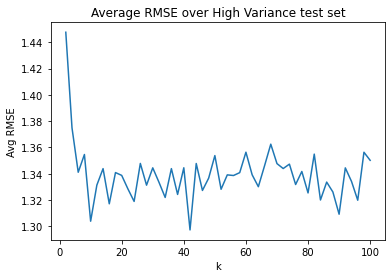

In [13]:
print("Minimum average RMSE is ", min(scores))
plt.plot(k_list, scores)
plt.xlabel('k')
plt.ylabel("Avg RMSE")
plt.title("Average RMSE over High Variance test set")
plt.show()

## Question 15

Plot the ROC curves for the k-NN collaborative filter designed in question 10
for threshold values [2.5, 3, 3.5, 4]. For the ROC plotting use the k found in question 11. For each
of the plots, also report the area under the curve (AUC) value.


In [8]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
trainset, testset = train_test_split(R_data, test_size=.10)

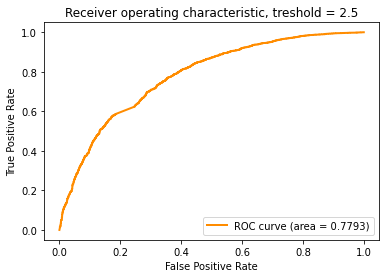

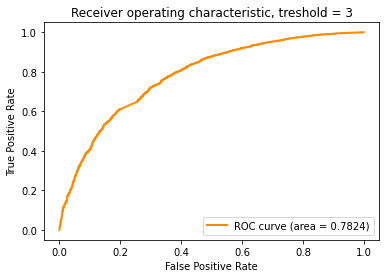

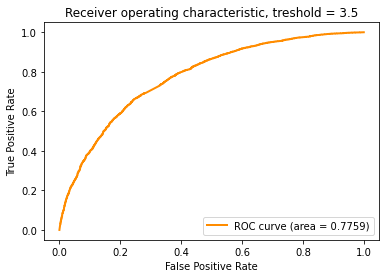

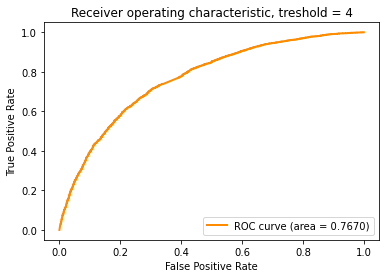

In [11]:
thres_list = [2.5, 3, 3.5, 4]

roc_auc = []

for t in thres_list:
    
    algo = KNNWithMeans(k = 20,sim_options = sim_options, verbose = False)
    algo.fit(trainset)
    preds = algo.test(testset)
    preds = np.asarray(preds)

    true_scores = preds[:,2] >= t #actual scores
    true_scores.astype(int)
    
    fpr, tpr, tt = roc_curve(true_scores, preds[:,3])
    roc_auc.append(auc(fpr, tpr))
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.4f)' % roc_auc[-1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic, treshold = {}'.format(t))
    plt.legend(loc="lower right")
    plt.show()